# Индивидуальный проект 

## Задача регрессии методом перцептрона

### Сергеев Никита

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv('./servo/servo.csv')

dataset.head()

,motor,screw,pgain,vgain,class
0,E,E,5,4,0.281251
1,B,D,6,5,0.506252
2,D,D,4,3,0.356251
3,B,A,3,2,5.500033
4,D,B,6,5,0.356251


1) Motor (Двигатель): Тип используемого двигателя (A, B, C, D или E).

2) Screw (Винт): Тип используемого винта или механической связи (A, B, C, D или E).

3) Pgain (Пропорциональное усиление): Непрерывный параметр, отражающий пропорциональное усиление системы, с несколькими уровнями (3, 4, 5 или 6).

4) Vgain (Ускорение): Еще один непрерывный параметр, представляющий собой уровень ускорения, с несколькими уровнями (1, 2, 3, 4 или 5).

5) Class (Класс): Целевой признак, который представляет собой время подъема сервомеханизма. Это числовое значение в диапазоне от 0,13 до 7,10.

## Построим графики зависимоти времени подъёма от различных признаков

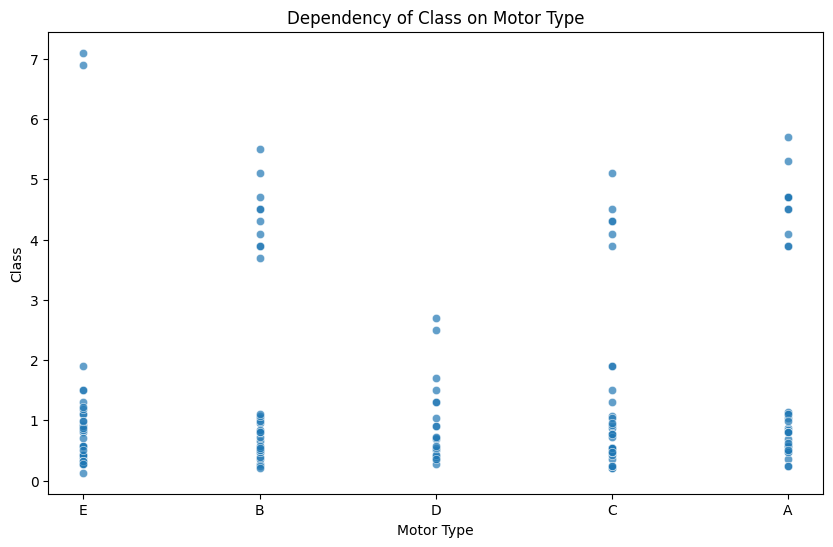

In [3]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='motor', y='class', data=dataset, alpha=0.7)

plt.xlabel('Motor Type')
plt.ylabel('Class')
plt.title('Dependency of Class on Motor Type')

plt.show()

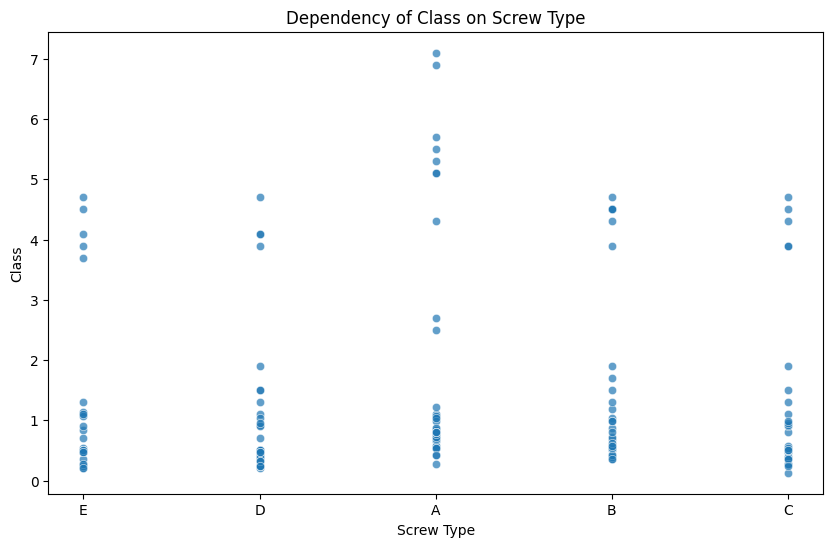

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='screw', y='class', data=dataset, alpha=0.7)

plt.xlabel('Screw Type')
plt.ylabel('Class')
plt.title('Dependency of Class on Screw Type')

plt.show()

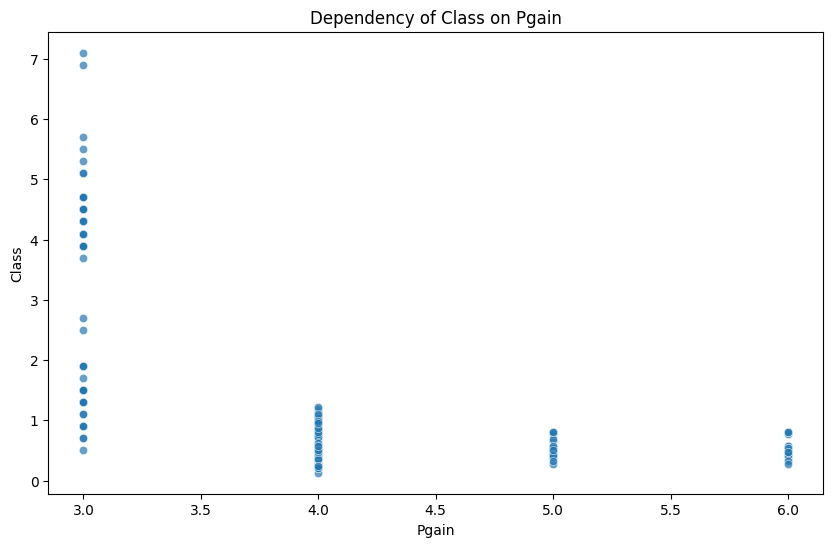

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pgain', y='class', data=dataset, alpha=0.7)

plt.xlabel('Pgain')
plt.ylabel('Class')
plt.title('Dependency of Class on Pgain')

plt.show()

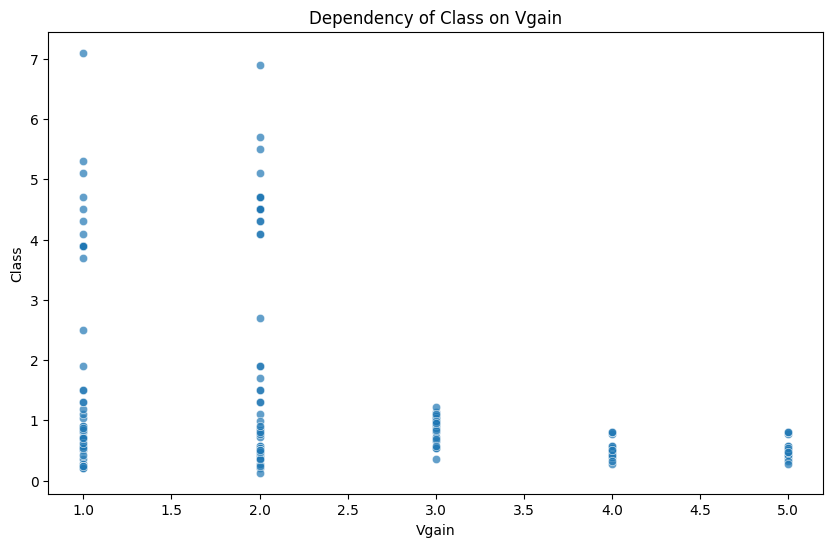

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vgain', y='class', data=dataset, alpha=0.7)

plt.xlabel('Vgain')
plt.ylabel('Class')
plt.title('Dependency of Class on Vgain')

plt.show()

## Построим корреляционную матрицу в виде тепловой карты

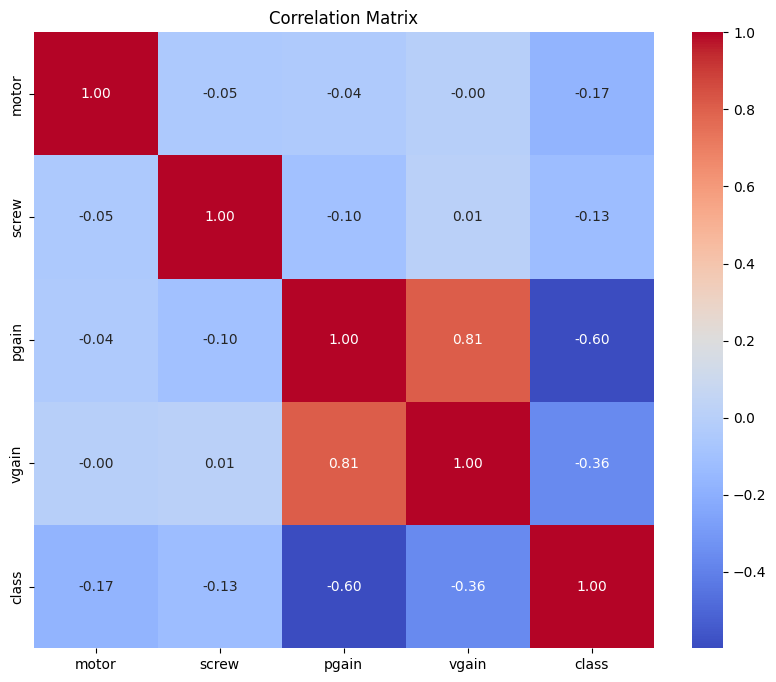

In [7]:
dt = dataset.copy()
mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5}
dt['motor'] = dt['motor'].map(mapping)
dt['screw'] = dt['screw'].map(mapping)

correlation_matrix = dt.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Построим регрессивную модель и найдём ошибку её предсказания

In [8]:
# Создание матрицы признаков X и вектора целевой переменной y
X = dataset.drop('class', axis=1)
y = dataset['class']

# Преобразование категориальных признаков
mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5}
X['motor'] = X['motor'].map(mapping)
X['screw'] = X['screw'].map(mapping)

# Разделение на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Параметры test_size и random_state выбраны так, чтобы ошибка была минимальна

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание и обучение MLPRegressor
mlp_regressor = MLPRegressor(hidden_layer_sizes=(10110,), max_iter=1000, tol=1e-3, random_state=32)

mlp_regressor.fit(X_train_scaled, y_train)

# hidden_layer_sizes=(100,): Этот параметр определяет архитектуру нейронной сети, в частности, количество и размеры скрытых слоев. 

# 100000 - 0.22681312490452668
# 10000 - 0.18622705339273593
# 1000 - 0.23695686208353509
# 100 - 0.3233052411803785
# 10 - 0.4708399946248234

# max_iter=1000: Этот параметр указывает максимальное количество итераций (проходов по данным) при обучении нейронной сети.
# Если оптимизация не сходится к решению, обучение будет завершено после указанного числа итераций.

# tol=1e-3: Это параметр, который определяет критерий остановки обучения. Обучение будет остановлено, 
# если изменение функции потерь между двумя последовательными итерациями будет меньше, чем значение tol.

# random_state=32: Этот параметр используется для задания начального состояния генератора случайных чисел. 

# Предсказание на тестовом наборе данных
y_pred = mlp_regressor.predict(X_test_scaled)

# Оценка качества модели с использованием среднеквадратичной ошибки
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.17864505868344066


## Воспользуемся полученной моделью

In [9]:
predicted_data = pd.DataFrame({'motor': ['B'], 'screw': ['D'], 'pgain': [3], 'vgain': [4]})
predicted_data['motor'] = predicted_data['motor'].map(mapping)
predicted_data['screw'] = predicted_data['screw'].map(mapping)
predicted_data_scaled = scaler.transform(predicted_data)

predicted_value = mlp_regressor.predict(predicted_data_scaled)

print(f'Predicted Value: {predicted_value}')

Predicted Value: [5.70348393]


Попробуем разбить столбцы motor и screw на 10 столбцов по типам мотора и винта (motor_A, motor_B, ..., screw_A, ...) и заполним так, чтобы в тех ячейках, которые удовлетворяют типу мотора и винта стояла 1, а в остальных 0.

In [10]:
dt = dataset.copy()

# Создание дополнительных столбцов для motor
motor_dummies = pd.get_dummies(dt['motor'], prefix='motor')
dt = pd.concat([dt, motor_dummies], axis=1)

# Создание дополнительных столбцов для screw
screw_dummies = pd.get_dummies(dt['screw'], prefix='screw')
dt = pd.concat([dt, screw_dummies], axis=1)

# Удаление оригинальных столбцов motor и screw
dt = dt.drop(['motor', 'screw'], axis=1)

# Вывод первых строк датасета
print(dt.head())


   pgain  vgain     class  motor_A  motor_B  motor_C  motor_D  motor_E   
0      5      4  0.281251    False    False    False    False     True  \
1      6      5  0.506252    False     True    False    False    False   
2      4      3  0.356251    False    False    False     True    False   
3      3      2  5.500033    False     True    False    False    False   
4      6      5  0.356251    False    False    False     True    False   

   screw_A  screw_B  screw_C  screw_D  screw_E  
0    False    False    False    False     True  
1    False    False    False     True    False  
2    False    False    False     True    False  
3     True    False    False    False    False  
4    False     True    False    False    False  


In [13]:
# Создание матрицы признаков X и вектора целевой переменной y
X = dt.drop(['class', 'motor_A', 'screw_D'], axis=1)

y = dt['class']

# Разделение на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Параметры test_size и random_state выбраны так, чтобы ошибка была минимальна

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание и обучение MLPRegressor
mlp_regressor = MLPRegressor(hidden_layer_sizes=(10110,), max_iter=1000, tol=1e-3, random_state=32)

mlp_regressor.fit(X_train_scaled, y_train)

# Предсказание на тестовом наборе данных
y_pred = mlp_regressor.predict(X_test_scaled)

# Оценка качества модели с использованием среднеквадратичной ошибки
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.5308636904822412
